In [ ]:
# "Stop and Search, Part III, Data Analysis"
> "I finish this project by plotting various charts to summarise the data obtained and cleaned from previous two parts"

- toc: true
- badges: true
- categories: [python]
- image: images/to_be_done.png

## Setting things up

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [49]:
sas = pd.read_csv('sas_clean.csv')

## Total number of stops and searches

### Grouped by ethnicity

In [58]:
sas_ethnicity = sas.groupby('ethnicity').ethnicity.count()

Text(0, 0.5, 'Number of Stop and Searches')

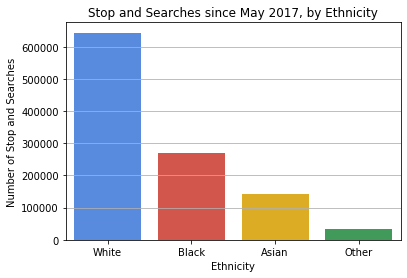

In [50]:
colours_255 = [(66, 133, 244,255), (234, 67, 53,255), (251, 188, 5,255), (52, 168, 83, 255)]

colours = [ tuple(n / 255 for n in colour) for colour in colours_255]

plt.figure
sns.barplot(x = sas_ethnicity.index, y = sas_ethnicity,
           order = ['White', 'Black', 'Asian', 'Other'],
           palette = colours)
plt.grid(True, axis = 'y')
plt.title('Stop and Searches since May 2017, by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Stop and Searches')

From this chart, a simplistic conclusion would be that white people are searched significantly more than other ethnicities, so there is no racism in the system. This is clearly simplistic as we need to account for the underlying population.

### Including population
Population data is taken from [here](https://www.ethnicity-facts-figures.service.gov.uk/uk-population-by-ethnicity/national-and-regional-populations/population-of-england-and-wales/latest#:~:text=the%20total%20population%20of%20England%20and%20Wales%20was%2056.1%20million,White%20ethnic%20group%20(4.4%25)).  I use the figures from this link to create a tuple of population figures. Note I group them in a similar way to how I grouped things in the cleaning of the stop and search dataset.

Text(0, 0.5, 'Population, % of total')

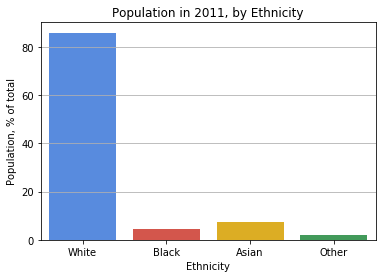

In [55]:
white = 80.5+5.5
black = 1.8+1.1+0.5+0.3+0.8
asian = 0.8+0.7+2+2.5+1.5
other = 100 - white - black - asian

population = pd.Series([white, black, asian, other], index = ['White', 'Black', 'Asian', 'Other'])

plt.figure
sns.barplot(x = population.index, y = population,
           order = ['White', 'Black', 'Asian', 'Other'],
           palette = colours)
plt.grid(True, axis = 'y')
plt.title('Population in 2011, by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Population, % of total')

Now things look bad. There is clearly a discrepancy between the population and the number of stop and searches.

To visualise this discrepancy more clearly, I decided to create a [Sankey diagram](http://www.sankey-diagrams.com/) using [Plotly](https://plotly.com/python/sankey-diagram/).

In [79]:
# create function that plots Sankey diagram given appropriate dataframe

def create_sankey(df, title):
    len = df.shape[0]
    
    fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Proportion of Population'] + list(df.index) + ['Proportion of Stop and Searches'],
      color = "blue"
    ),
    link = dict(
      source = [0]*len + list(range(1,len+1)),
      target = list(range(1,len+1)) + [len+1]*len,
      value = df.iloc[:,0].append(df.iloc[:,1])
    ))])

    fig.update_layout(title_text=title, font_size=15)
    fig.show()

In [83]:
# create dataframe containing population and stop and search data by ethnicity
sas_eth_pop = pd.DataFrame({'population': population, 'sas': sas_ethnicity, }, index = sas_ethnicity.index)
sas_eth_pop = sas_eth_pop.loc[['White', 'Black', 'Asian', 'Other']]
sas_eth_pop.sas = sas_eth_pop.sas/sas_eth_pop.sas.sum()*100


# create sankey diagram
create_sankey(sas_eth_pop, 'Stop and Searches by Ethnicity')

This Sankey diagram shows clearly the discrepancy. If you hover over the bars, you will the values. For example, 4.5% of the population was black but ~25% of the stop and searches were on black people. This is a clear sign that things are wrong in our society.

However, and unfortunately, this diagram does not tell us where exactly the problem is. Is the problem with the police or is there a deeper problem? Are the police racist for stopping black people more often, or, is this a reflection of underlying crime rates?

To emphasise why these charts alone are not conclusive, consider the following two charts:

In [92]:
# create dataframe containing population and stop and search data by gender
sas_gender = sas.groupby('gender').ethnicity.count()
sas_gender = sas_gender.loc[['Male', 'Female', 'Other']]/sas_gender.sum()*100
population_gender = pd.Series([49.75, 49.75, 0.5], index = ['Male', 'Female', 'Other'])

sas_gen = pd.DataFrame({'population': population_gender, 'sas': sas_gender, }, index = sas_gender.index)

# create sankey diagram
create_sankey(sas_gen, 'Stop and Searches by Gender')

In [ ]:
white = 80.5+5.5
black = 1.8+1.1+0.5+0.3+0.8
asian = 0.8+0.7+2+2.5+1.5
other = 100 - white - black - asian

population = pd.Series([white, black, asian, other], index = ['White', 'Black', 'Asian', 'Other'])

In [98]:
# create dataframe containing population and stop and search data by age
sas_age = sas.groupby('age_range').age_range.count()
sas_age = sas_age.loc[['under 10', '10-17', '18-24', '25-34', 'over 34']]/sas_age.sum()*100

under_10 = 6.2+5.6
ten_17 = 5.8+3.7
eighteen_24 = 9.4
twentyfive_34 = 6.8+6.6
over_35 = 100 - under_10 - ten_17 - eighteen_24 - twentyfive_34
population_age = pd.Series([under_10, ten_17, eighteen_24, twentyfive_34, over_35],
                           index = ['under 10', '10-17', '18-24', '25-34', 'over 34'])

sas_age = pd.DataFrame({'population': population_age, 'sas': sas_age, }, index = sas_age.index)

# create sankey diagram
create_sankey(sas_age, 'Stop and Searches by Age')

The majority of people, I assume, would not conclude that the police are sexists or agists, based on these diagrams. 

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Population', 'White', 'Asian', 'Black', 'Other', 'Stop and Searches'],
      color = "blue"
    ),
    link = dict(
      source = [0,0,0,0,1,2,3,4],
      target = [1,2,3,4,5,5,5,5],
      value = population_ethnicity.append(total_ethnicity)
  ))])

fig.update_layout(title_text="Stop and Searches, by Ethnicity. Version 1", font_size=15)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['White Population', 'Asian Population', 'Black Population', 'Other Population',
               '',
               'White Stop and Searches', 'Asian Stop and Searches', 'Black Stop and Searches', 'Other Stop and Searches'],
      color = "blue"
    ),
    link = dict(
      source = [0,1,2,3,4,4,4,4],
      target = [4,4,4,4,5,6,7,8],
      value = population_ethnicity.append(total_ethnicity)
  ))])

fig.update_layout(title_text="Stop and Searches, by Ethnicity. Version 2", font_size=15)
fig.show()